In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
digits = load_digits()

<Figure size 640x480 with 0 Axes>

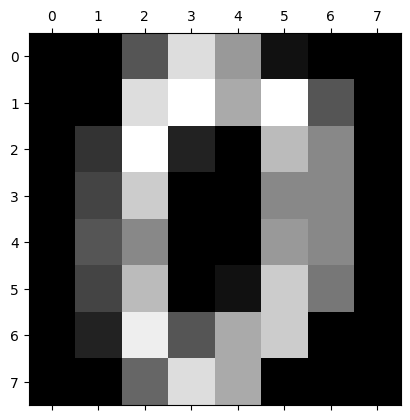

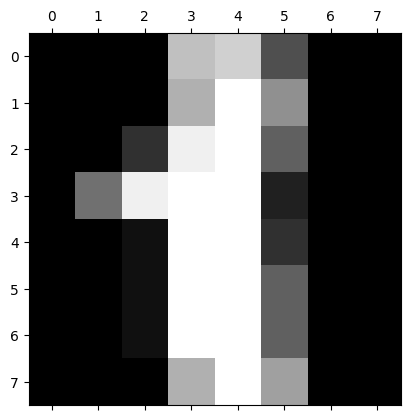

In [6]:
plt.gray()
plt.matshow(digits.images[0])
plt.matshow(digits.images[1])
plt.show()

In [7]:
x, y = load_digits(return_X_y=True)
print("x", x.shape)
print("y", y.shape)

x (1797, 64)
y (1797,)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

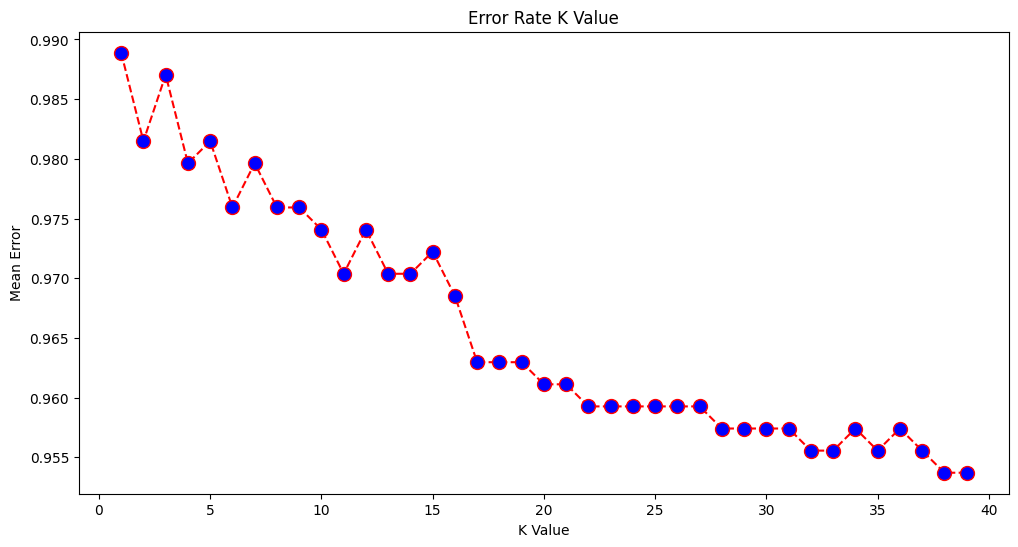

In [24]:
#aplicar knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#como encontrar k optimo
accuracy = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [28]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("accuracy_score", accuracy_score(y_test, y_pred))

accuracy_score 0.9814814814814815


<Axes: >

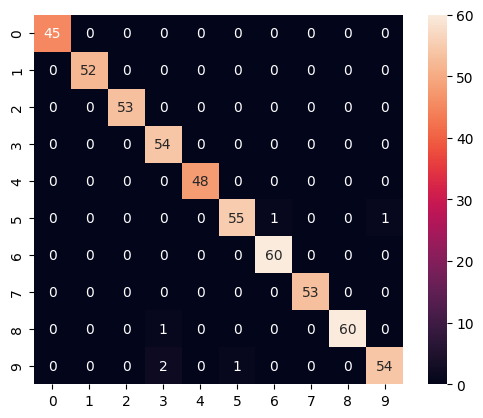

In [22]:
#graficar confusion matrix
matcon = confusion_matrix(y_test, y_pred)
sns.heatmap(matcon, square=True, annot=True)

In [32]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        52
           2       0.98      1.00      0.99        53
           3       0.91      0.98      0.95        54
           4       1.00      1.00      1.00        48
           5       0.98      0.96      0.97        57
           6       0.98      1.00      0.99        60
           7       1.00      1.00      1.00        53
           8       1.00      0.95      0.97        61
           9       0.98      0.93      0.95        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [42]:
#Regresion logistica
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)
print("accuracy_score", accuracy_score(y_test, y_pred_log))

accuracy_score 0.9537037037037037


c:\Users\16joa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
logregL1 = LogisticRegression(penalty='none', solver="newton-cg")
logregL1.fit(x_train, y_train)
y_pred_log_L1 = logregL1.predict(x_test)
print("accuracy_score", accuracy_score(y_test, y_pred_log_L1))


c:\Users\16joa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


accuracy_score 0.9425925925925925


In [49]:
solver = ['lbfgs', 'newton-cholesky', 'liblinear', 'newton-cg', 'saga', 'sag']

#for i in solver:
logregL1 = LogisticRegression(penalty='none', solver="newton-liblinear")
logregL1.fit(x_train, y_train)
y_pred_log_L1 = logregL1.predict(x_test)
print("accuracy_score", accuracy_score(y_test, y_pred_log_L1))



InvalidParameterError: The 'solver' parameter of LogisticRegression must be a str among {'lbfgs', 'newton-cholesky', 'liblinear', 'newton-cg', 'saga', 'sag'}. Got 'newton-liblinear' instead.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.89      0.94      0.92        52
           2       0.98      0.92      0.95        53
           3       0.95      0.96      0.95        54
           4       0.98      0.98      0.98        48
           5       0.98      0.96      0.97        57
           6       1.00      0.98      0.99        60
           7       0.98      0.96      0.97        53
           8       0.93      0.87      0.90        61
           9       0.87      0.96      0.92        57

    accuracy                           0.95       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.95      0.95       540



<Axes: >

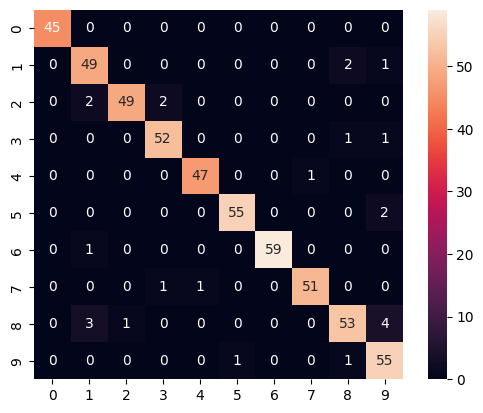

In [51]:

#graficar confusion matrix

print(classification_report(y_test, y_pred_log))

matcon_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(matcon_log, square=True, annot=True)

In [34]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nb = gnb.predict(x_test)

print("accuracy_score", accuracy_score(y_test, y_pred_nb))

accuracy_score 0.8240740740740741


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.74      0.88      0.81        52
           2       0.96      0.49      0.65        53
           3       0.66      0.85      0.74        54
           4       0.95      0.75      0.84        48
           5       0.98      0.89      0.94        57
           6       0.95      0.98      0.97        60
           7       0.79      0.98      0.87        53
           8       0.61      0.84      0.70        61
           9       0.97      0.58      0.73        57

    accuracy                           0.82       540
   macro avg       0.86      0.83      0.82       540
weighted avg       0.86      0.82      0.82       540



<Axes: >

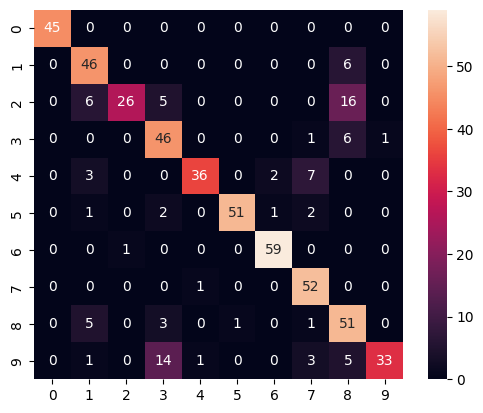

In [50]:

#graficar confusion matrix

print(classification_report(y_test, y_pred_nb))

matcon_log = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matcon_log, square=True, annot=True)

In [ ]:
# Spam